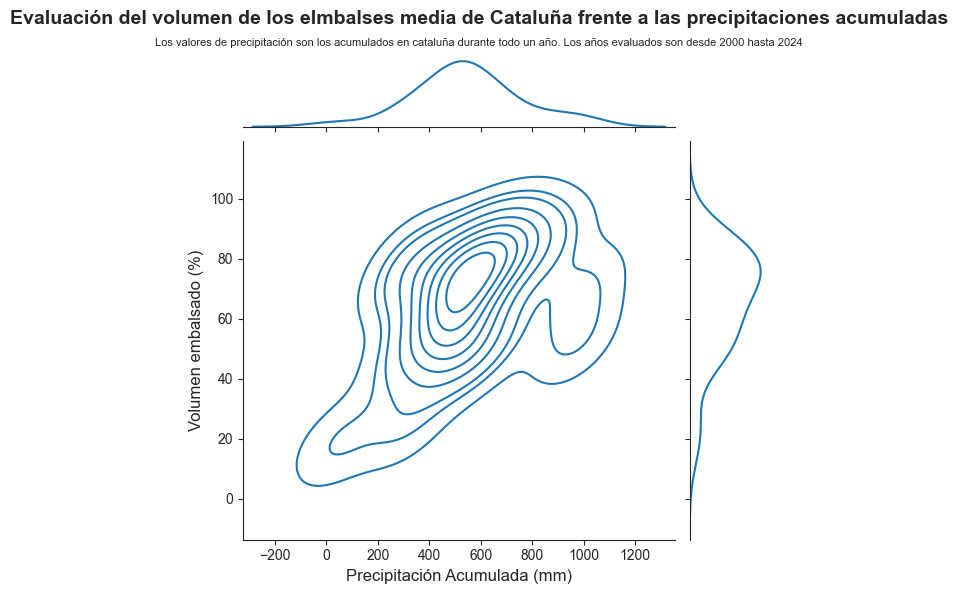

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

df = pd.read_csv('download.csv', encoding='latin-1')
# Convertir la columna de FECHA a tipo datetime

df2 = pd.read_csv('gn9e-3qhr_version_649.csv')
df2['dia']=pd.to_datetime(df2['dia'])
df2['dia']=df2['dia'].dt.year
media_porcentaje_llenado = df2.groupby([df2['dia'], 'estaci'])['percentatge_volum_embassat'].mean()

# Si deseas obtener un nuevo DataFrame con estos resultados
nuevo_df = media_porcentaje_llenado.reset_index()

nuevo_df2=nuevo_df.groupby([nuevo_df['dia']])['percentatge_volum_embassat'].mean()

merged_df = pd.merge(df, nuevo_df2, left_on='Año',right_on='dia', how='inner')


joint_plot=sns.jointplot(x=merged_df["Precipitación Acumulada"], y=merged_df["percentatge_volum_embassat"], kind='kde')
# Añadir título y subtítulo
plt.subplots_adjust(top=0.9) # Ajustar la posición del título
joint_plot.fig.suptitle("Evaluación del volumen de los elmbalses media de Cataluña frente a las precipitaciones acumuladas", 
                        fontsize=14, fontweight='bold')
joint_plot.ax_joint.set_xlabel("Precipitación Acumulada (mm)", fontsize=12)
joint_plot.ax_joint.set_ylabel("Volumen embalsado (%)", fontsize=12)
joint_plot.fig.text(x=0.5, y=0.92, s="Los valores de precipitación son los acumulados en cataluña durante todo un año. Los años evaluados son desde 2000 hasta 2024", fontsize=8,ha='center')
sns.set_style("ticks")
# Mostrar el gráfico
plt.show()

